# Exploring Bike Sharing Patterns in London

This project analyzes bike-sharing data in London to uncover usage patterns, the impact of weather and holidays on bike rentals, and temporal trends. The dataset includes information on rental counts, weather conditions, holidays, and timestamps.

The data is sourced from Kaggle - "London bike sharing dataset"

## Data Preparation

The dataset was preprocessed by renaming columns for clarity, adjusting humidity values to a percentage scale, and mapping categorical codes (weather and seasons) to descriptive labels. These changes improve data interpretability and analysis.

In [1]:
import pandas as pd

In [2]:
#read in csv file as a pandas dataframe
df = pd.read_csv("~/Downloads/london_merged.csv")

In [3]:
#Explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
df.shape

(17414, 10)

In [5]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
#Count unique values in the weather_code col
df.weather_code.value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [7]:
#Count unique values in the season col
df.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [8]:
#Specifying the col names
new_cols_dict ={
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

#Renaming to specified col names
df.rename(new_cols_dict, axis=1, inplace=True)

In [9]:
#Adjust humidity values to percentage (i.e. a value between 0 and 1)
df.humidity_percent = df.humidity_percent / 100

In [10]:
#Creating a season dictionary to map integer codes to written values
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

#Creating a weather dictionary to map the integer codes to written values
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

#Changing seasons col data type to string
df.season = df.season.astype('str')

#Mapping codes to written vals
df.season = df.season.map(season_dict)

#Changing weather col data type to string
df.weather = df.weather.astype('str')

#Mapping codes to written vals
df.weather = df.weather.map(weather_dict)

In [11]:
#Adjust time col to correct format
df['time'] = pd.to_datetime(df['time'])

In [12]:
#Check df to ensure values mapped correctly
df.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter


## Exploratory Data Analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

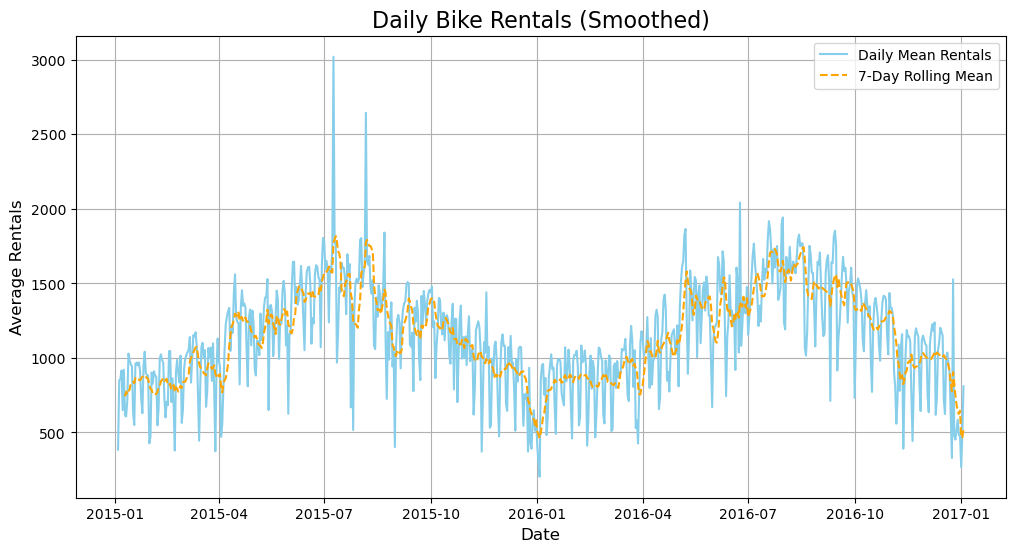

In [14]:
#Time Series Plot w/ Rolling Mean
plt.figure(figsize=(12, 6))

#Downsample to daily mean
daily_data = df.resample('D', on='time')['count'].mean()
sns.lineplot(data=daily_data, label='Daily Mean Rentals', color='skyblue')

#Add rolling mean for smoothing
rolling_mean = daily_data.rolling(window=7).mean()
sns.lineplot(data=rolling_mean, label='7-Day Rolling Mean', color='orange', linestyle='--')

plt.title('Daily Bike Rentals (Smoothed)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

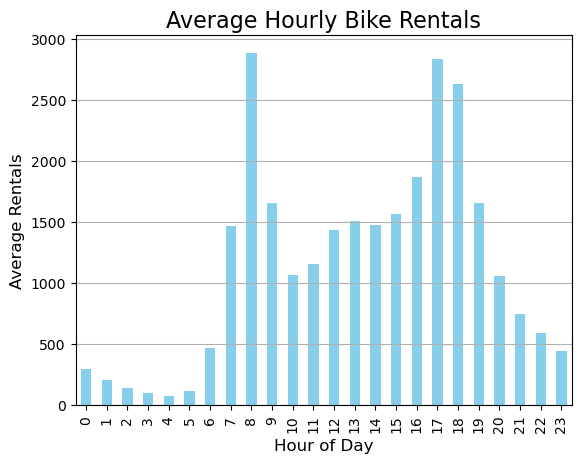

In [15]:
#Hourly Rentals
hourly_rentals = df.groupby(df['time'].dt.hour)['count'].mean()
hourly_rentals.plot(kind='bar', color='skyblue')
plt.title('Average Hourly Bike Rentals', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.grid(axis='y')
plt.show()

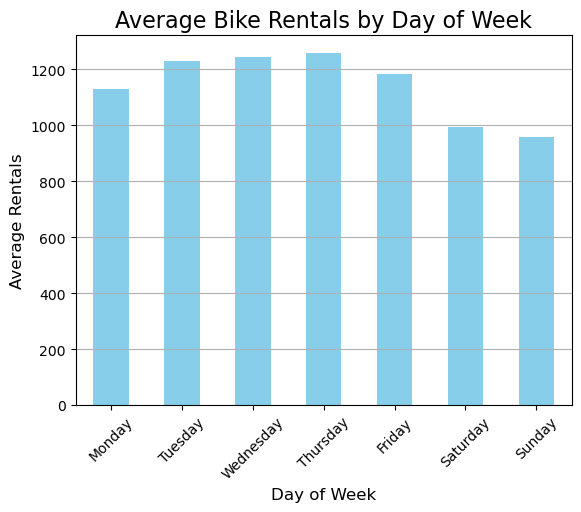

In [16]:
#Rentals by Day of Week
daily_rentals = df.groupby(df['time'].dt.dayofweek)['count'].mean()
daily_rentals.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rentals.plot(kind='bar', color='skyblue')
plt.title('Average Bike Rentals by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

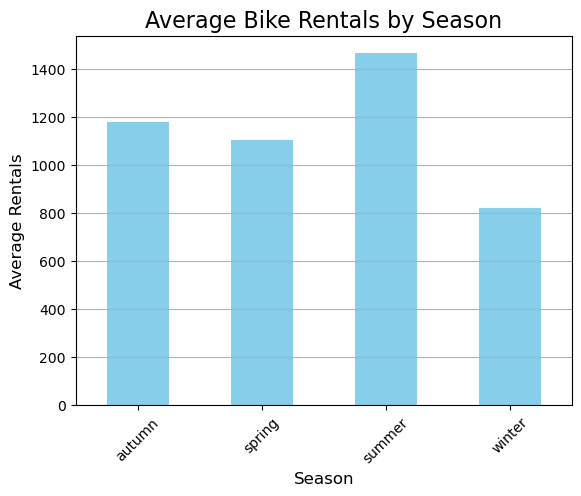

In [17]:
#Rentals by Season
seasonal_rentals = df.groupby('season')['count'].mean()
seasonal_rentals.plot(kind='bar', color='skyblue')
plt.title('Average Bike Rentals by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

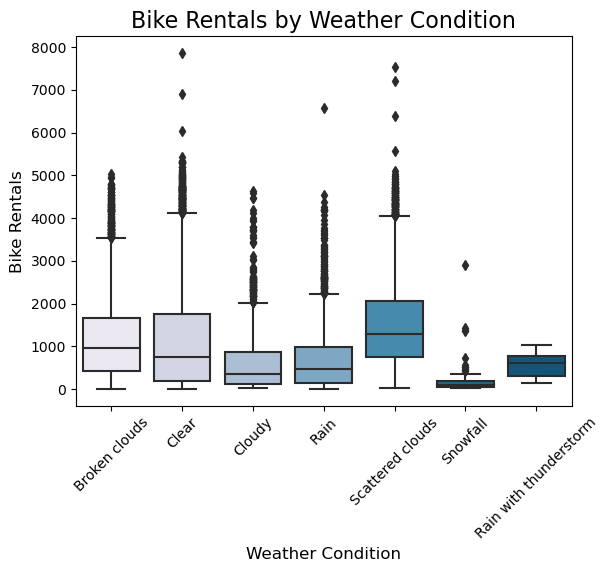

In [18]:
#Rentals by Weather Condition
sns.boxplot(data=df, x='weather', y='count', palette='PuBu')
plt.title('Bike Rentals by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Bike Rentals', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Hypothesis Testing

I conducted hypothesis tests to analyze the impact of holidays and weather conditions on bike rentals. Key findings include:

- A significant difference in bike rentals between holidays and non-holidays.
- Significant variability in bike rentals across different weather conditions.

In [19]:
from scipy.stats import ttest_ind

#Separate rentals into holiday & non-holiday groups
holiday_rentals = df[df['is_holiday'] == 1]['count']
non_holiday_rentals = df[df['is_holiday'] == 0]['count']

#Perform t-test
t_stat_holiday, p_value_holiday = ttest_ind(holiday_rentals, non_holiday_rentals)

#Output results
print(f"Holiday Impact - t-statistic: {t_stat_holiday:.2f}, p-value: {p_value_holiday:.2e}")

Holiday Impact - t-statistic: -6.83, p-value: 8.71e-12


I performed a t-test to determine whether there is a significant difference in bike rentals on holidays compared to non-holidays.

*Null Hypothesis - There is no difference in bike rentals between holidays and non-holidays.*

*Alternative Hypothesis - There is a significant difference in bike rentals between holidays and non-holidays.*

Since p < 0.05, I **reject the null hypothesis**, which indicates a statistically significant difference in bike rentals between holidays and non-holidays. The negative t-statistic suggests that bike rentals are lower on holidays.

In [20]:
from scipy.stats import f_oneway

#Create groups of rentals by weather conditions
weather_groups = [df[df['weather'] == condition]['count'] for condition in df['weather'].unique()]

#Perform one-way ANOVA
f_stat_weather, p_value_weather = f_oneway(*weather_groups)

#Output results
print(f"Weather Impact - F-statistic: {f_stat_weather:.2f}, p-value: {p_value_weather:.2e}")

Weather Impact - F-statistic: 202.96, p-value: 4.09e-251


I performed a one-way ANOVA test to determine whether there is a significant difference in bike rentals across different weather conditions.

*Null Hypothesis - Weather conditions do not affect bike rentals.*

*Alternative Hypothesis - There is a significant difference in bike rentals across weather conditions.*

Since p < 0.05, I **reject the null hypothesis**, which indicates a statistically significant difference in bike rentals across different weather conditions.

In [ ]:
#Writing final df to excel file
df.to_excel('london_bikes_final.xlsx', sheet_name='Data')